In [11]:
import drawSvg as draw
import random

In [36]:
xMax= 250
yMax = 250


In [45]:
class Circle:
    def __init__(self, x,y,r):
        self.x = x
        self.y = y
        self.r = r
    
    def toSvg(self):
        return draw.Circle(self.x,self.y,self.r, stroke_width=2,stroke='black', fill='none')

In [46]:
def randomX():
    return random.randrange(-1*xMax,xMax)
def randomY():
    return random.randrange(-1*yMax,yMax)

In [47]:
randomX()

241

In [48]:
circles = [ Circle(randomX(),randomY(), random.randrange(5,20)) for _ in range(10) ]

In [49]:
circles

In [50]:
d = draw.Drawing(xMax*2, yMax*2, origin='center')


In [51]:
for c in circles:
    d.append(c.toSvg())

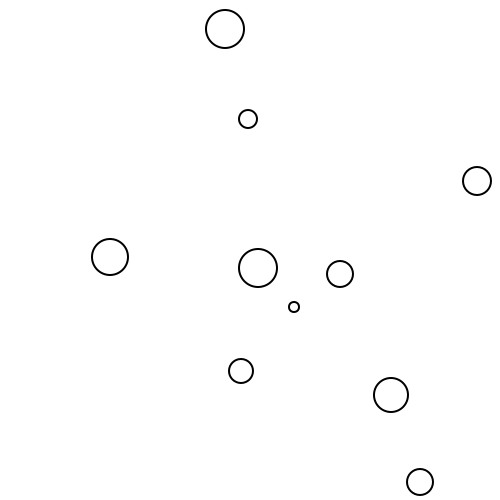

In [52]:
# Display in Jupyter notebook
d.rasterize()  # Display as PNG
d  # Display as SVG

In [ ]:
d.saveSvg('packed.svg')